## Team : Astonishing Almonds


In [ ]:
# Authors:

# Akhilesh
# Shridavi
# Rahul

# Company: AI Camp Inc.


In [ ]:
# install 3d party libs

! pip install plotly

In [7]:
# libs

import pandas as pd


## Source Data: Github

In [8]:
!wget "https://github.com/akhilesh-kanmanthreddy/Superconductivity_Temperature_Dataframe_Project/raw/main/train.parquet" -O train.parquet
!wget "https://github.com/akhilesh-kanmanthreddy/Superconductivity_Temperature_Dataframe_Project/raw/main/unique_m.parquet" -O unique_m.parquet



--2023-07-28 14:41:48--  https://github.com/akhilesh-kanmanthreddy/Superconductivity_Temperature_Dataframe_Project/raw/main/train.parquet
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/akhilesh-kanmanthreddy/Superconductivity_Temperature_Dataframe_Project/main/train.parquet [following]
--2023-07-28 14:41:49--  https://raw.githubusercontent.com/akhilesh-kanmanthreddy/Superconductivity_Temperature_Dataframe_Project/main/train.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7086657 (6.8M) [application/octet-stream]
Saving to: ‘train.parquet’

train.parquet       100%[===================>] 

In [9]:
train = pd.read_parquet("train.parquet")
unique_m = pd.read_parquet('unique_m.parquet')

train.shape, unique_m.shape

((21263, 82), (21263, 88))

In [10]:
train.shape

(21263, 82)

In [11]:
train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


## Feature Selection

In [15]:
#importing dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [17]:
# Assuming 'df' is your DataFrame containing the dataset
X = train.drop(columns=['critical_temp'])  # Features
y = train['critical_temp']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [27]:
important_columns = list(feature_importance_df.head(10)['Feature'])
important_columns.append('critical_temp')


###  Plot important features:


In [92]:
import plotly.express as px

# Assuming 'feature_importance_df' is your DataFrame with 'Feature' and 'Importance' columns

# Create the bar chart figure using Plotly Express
fig = px.bar(feature_importance_df, x='Feature', y='Importance', color='Feature', text='Importance')

# Customizing the layout
fig.update_layout(
    title_text="Feature Importance",
    xaxis_title="Feature",
    yaxis_title="Importance",
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Set plot background color (transparent)
)

# Customizing the bars
fig.update_traces(
    marker_color='rgb(0, 158, 115)',  # Set bar color (you can use HEX or RGB values)
    marker_line_color='rgb(8, 48, 107)',  # Set bar outline color
    marker_line_width=1.5,  # Set bar outline width
    texttemplate='%{text:.2f}',  # Set the text format on the bars to display raw Importance values
    textposition='inside',  # Place the text inside the bars
    textfont=dict(size=12),  # Set the font size for text on the bars
)

# Show the figure
fig.show()


## Sampling the data for EDA:

In [ ]:
df = train.filter(items=important_columns)

## stratified sampling:
failed in our case, for minor class having one instance; use **upsampling**

## upsampling

In [33]:
from sklearn.utils import resample

# Separate the minority class (class with only one sample)
minority_class = df[df['critical_temp'].duplicated(keep=False)]
print(minority_class.shape)

# Separate the majority class (all other classes except the minority class)
majority_class = df[~df['critical_temp'].duplicated(keep=False)]
print(majority_class.shape)

# Upsample the minority class to match the size of the majority class
upsampled_minority = resample(minority_class,
                             replace=True,       # Sample with replacement
                             n_samples=len(majority_class),   # Upsample to match majority class size
                             random_state=42)    # Set a random seed for reproducibility

# Combine the upsampled minority class with the majority class
upsampled_df = pd.concat([majority_class, upsampled_minority])


(20116, 11)
(1147, 11)


In [79]:
train_subset, test_subset  = train_test_split(upsampled_df, test_size=0.1, random_state=42)
test_subset.shape

(230, 11)

In [55]:
for idx, column in enumerate(test_subset.columns):
  print(column)
  # print(f"x{idx+1}= test_subset['{column}']")

range_ThermalConductivity
wtd_gmean_ThermalConductivity
std_atomic_mass
wtd_gmean_Valence
wtd_entropy_ThermalConductivity
gmean_ElectronAffinity
mean_Density
wtd_mean_Valence
std_Density
wtd_range_Valence
critical_temp


## Visualizations:

### Histogram:

In [93]:
import plotly.express as px

fig = px.histogram(train, x='mean_atomic_mass', nbins=20, histnorm='probability',
                   title='Histogram of Mean Atomic Mass', labels={'mean_atomic_mass': 'Mean Atomic Mass'})
fig.update_layout(showlegend=False)
fig.show()

### Basic linear regression plot

In [80]:
import plotly.express as px

fig = px.scatter(
    test_subset, x='wtd_entropy_ThermalConductivity', y='critical_temp', opacity=0.65,
    trendline='ols', trendline_color_override='red'
)
fig.show()

### scatter plot

In [84]:
import pandas as pd
import plotly.graph_objects as go

# Assuming 'test_subset' is your DataFrame containing the specified columns

# Create a list of 3D scatter plot figures
figs = []

# Loop through each column name and create a 3D scatter plot against 'critical_temp'
for col in test_subset.columns[:-1]:
  fig = go.Figure()
  fig.add_trace(
      go.Scatter3d(
          x=test_subset[col].values,
          y=test_subset['critical_temp'],
          z=test_subset['critical_temp'],  # Z-axis can be 'critical_temp' to visualize target values
          mode='markers',
          marker=dict(
              size=5,
              opacity=0.8,
              colorscale='Viridis',  # You can choose a different colorscale
              colorbar=dict(title="Target (Critical Temp)", thickness=15),
          ),
      )
  )

  fig.update_layout(
      title_text=f"Scatterplot3D for {col} vs. Critical Temp",
      scene=dict(xaxis_title=col, yaxis_title="Y: Critical Temp", zaxis_title="Z: Target (Critical Temp)"),
      height=500,
      width=700,
  )

  figs.append(fig)

# Display each 3D scatter plot as a separate figure
for fig in figs:
    fig.show()


### Heat Map ( Data Correlation)

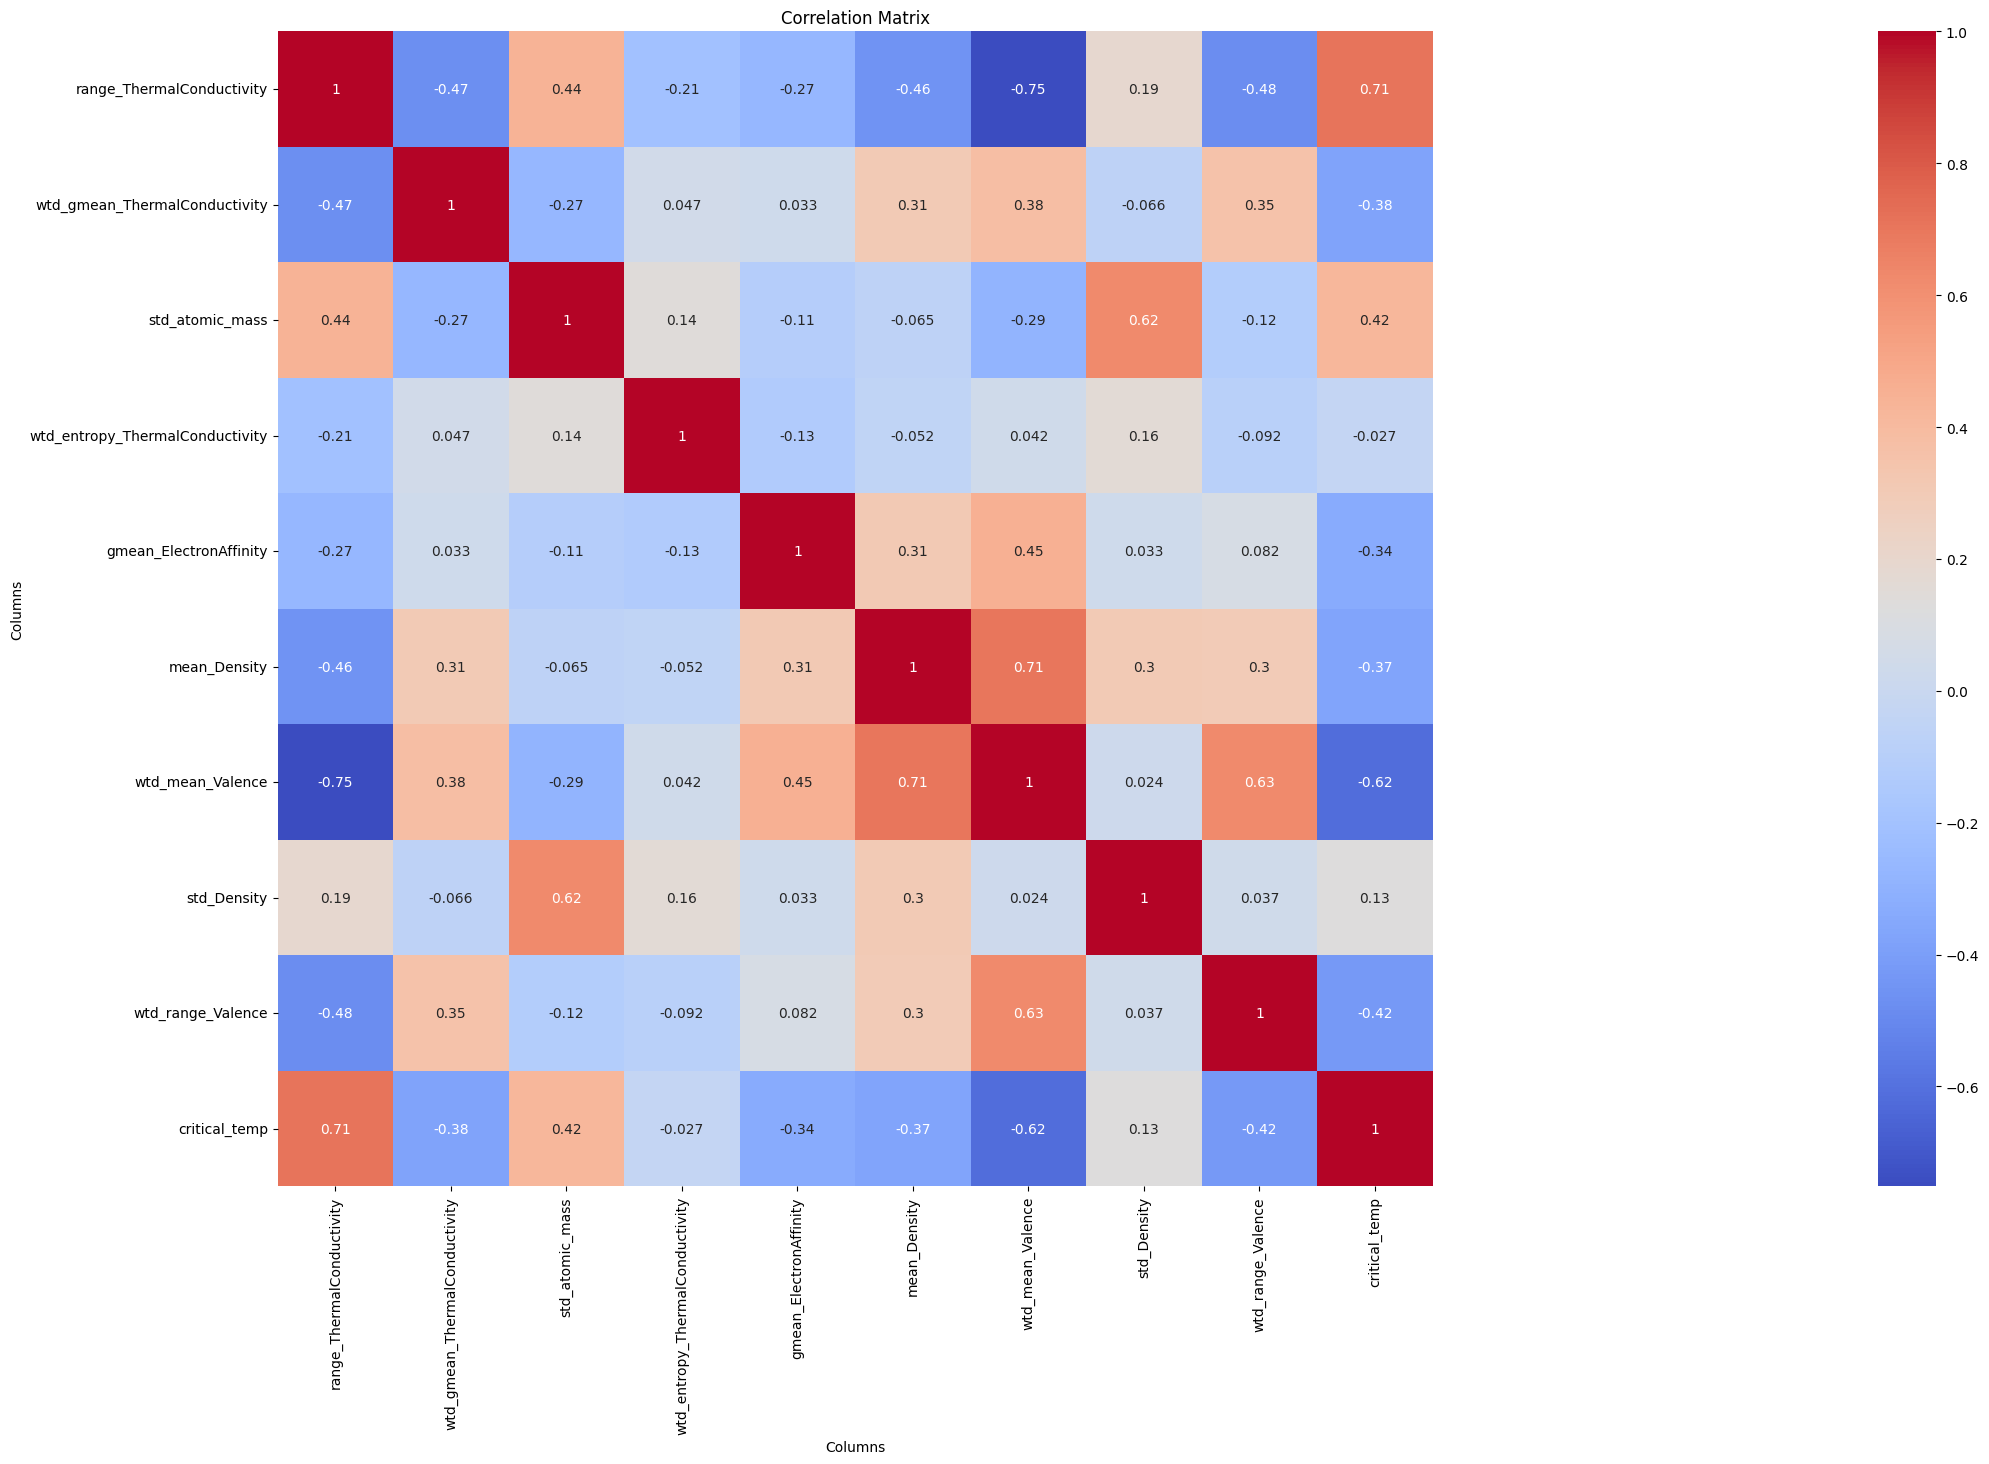

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns


# creating accurate heatmap
def heatmap(superc_df):
    correlation_matrix = superc_df.corr()

    # Create a heatmap using seaborn
    plt.figure(figsize=(115, 15))  # Set the figure size
    sns.heatmap(correlation_matrix, annot = True, cmap="coolwarm", square=True)

    # Set plot labels and title
    plt.title('Correlation Matrix')
    plt.xlabel('Columns')
    plt.ylabel('Columns')

    # Display the heatmap
    plt.show()



tmp  = test_subset.drop(columns=['wtd_gmean_Valence'])
heatmap(tmp)
